In [45]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [6]:
pip install nltk


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 406.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 2.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.9 MB/s eta 0:00:00
   -----------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 655.4 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [10]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...


True

In [12]:
df=pd.read_csv(r'C:\Users\alekh\Desktop\MMAI\AI\ProjectAI\dataset\AI_Condensed_Data_Useful_Data.csv')

In [13]:
df.head()

,QKEY,TECH1_W99,CNCEXC_W99,EXCITEOE_W99_OE1,EXCITEOE_W99_OE2,EXCITEOE_W99_OE3,ALGFAIR_W99,DISCRIM1_a_W99,DISCRIM1_b_W99,DISCRIM1_c_W99,...,DCARS12_W99,DCARS13_a_W99,DCARS13_b_W99,DCARS13_c_W99,DCARS13_d_W99,F_MARITAL,F_RELIG,F_PARTY_FINAL,F_REG,F_INC_TIER2
0,100260.0,NaN,Equally concerned and excited,NaN,NaN,NaN,Not possible,Not too well,Very well,Very well,...,NaN,NaN,NaN,NaN,NaN,Never been married,Nothing in particular,Republican,You are ABSOLUTELY CERTAIN that you are regist...,Middle income
1,100314.0,Mostly positive,More excited than concerned,Don't know/No answer,NaN,NaN,Possible,Very well,Not too well,Not too well,...,Somewhat comfortable,Not sure,Oppose,Favor,Favor,Divorced,Protestant,Republican,You are ABSOLUTELY CERTAIN that you are regist...,Middle income
2,100363.0,Mostly positive,Equally concerned and excited,NaN,NaN,NaN,Not possible,Somewhat well,Somewhat well,Somewhat well,...,Very comfortable,Favor,Not sure,Favor,Favor,Married,Roman Catholic,Democrat,You are ABSOLUTELY CERTAIN that you are regist...,Upper income
3,100598.0,NaN,Equally concerned and excited,NaN,NaN,NaN,Not possible,Not sure,Not sure,Not sure,...,NaN,NaN,NaN,NaN,NaN,Married,Protestant,Republican,You are ABSOLUTELY CERTAIN that you are regist...,Upper income
4,100637.0,NaN,Equally concerned and excited,NaN,NaN,NaN,Not sure,Not sure,Not sure,Not sure,...,NaN,NaN,NaN,NaN,NaN,Married,Protestant,Independent,You are ABSOLUTELY CERTAIN that you are regist...,Lower income


In [11]:
#To Extract the relevant columns
concerns = df['CNCEXC_W99'].dropna()
excitement = df['EXCITEOE_W99_OE1'].dropna()

In [19]:

# Combine concerns and excitement into a single series for unified analysis
combined_text = pd.concat([concerns, excitement]).reset_index(drop=True)

In [20]:
# Predefined stop words (if NLTK download is not possible)
predefined_stopwords = set(stopwords.words('english'))

In [23]:
# Preprocess text function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in predefined_stopwords]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [24]:
# Apply preprocessing
combined_cleaned = combined_text.apply(preprocess_text)

In [30]:
combined_cleaned

0           [equally, concerned, excited]
1                    [excited, concerned]
2           [equally, concerned, excited]
3           [equally, concerned, excited]
4           [equally, concerned, excited]
                       ...               
12108    [handle, mundane, tedious, task]
12109       [make, life, society, better]
12110                   [help, worklabor]
12111                [personal, anecdote]
12112       [make, life, society, better]
Length: 12113, dtype: object

In [25]:
# Flatten the list of tokens
all_tokens = [token for tokens in combined_cleaned for token in tokens]

In [29]:
all_tokens

['equally',
 'concerned',
 'excited',
 'excited',
 'concerned',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'excited',
 'concerned',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'excited',
 'concerned',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',


In [26]:
# Get the frequency distribution of words
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(50)  # Adjust the number of common words as needed

In [28]:
common_words

[('concerned', 10223),
 ('excited', 10223),
 ('equally', 4597),
 ('make', 555),
 ('life', 555),
 ('society', 555),
 ('better', 555),
 ('dont', 287),
 ('knowno', 287),
 ('answer', 287),
 ('task', 219),
 ('help', 204),
 ('save', 186),
 ('time', 186),
 ('efficient', 186),
 ('inevitable', 161),
 ('progress', 161),
 ('future', 161),
 ('handle', 146),
 ('mundane', 146),
 ('tedious', 146),
 ('human', 141),
 ('ai', 82),
 ('interesting', 82),
 ('exciting', 82),
 ('worklabor', 78),
 ('difficultdangerous', 73),
 ('accurate', 68),
 ('elderlyhave', 53),
 ('disability', 53),
 ('personal', 40),
 ('anecdote', 40),
 ('refused', 37),
 ('people', 16),
 ('fear', 16),
 ('based', 16),
 ('scifi', 16),
 ('reality', 16)]

In [31]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

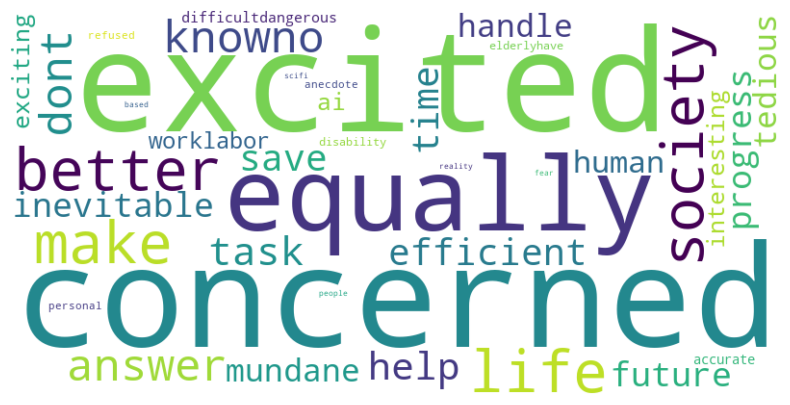

In [32]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [33]:
# Convert preprocessed text back to strings
combined_cleaned_str = combined_cleaned.apply(lambda x: ' '.join(x))

In [34]:
combined_cleaned_str

0          equally concerned excited
1                  excited concerned
2          equally concerned excited
3          equally concerned excited
4          equally concerned excited
                    ...             
12108    handle mundane tedious task
12109       make life society better
12110                 help worklabor
12111              personal anecdote
12112       make life society better
Length: 12113, dtype: object

In [36]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(combined_cleaned_str)

In [38]:
vectorizer

TfidfVectorizer(max_features=1000)

In [40]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [41]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

In [42]:
# Get top terms per cluster
top_terms_per_cluster = []
for i in range(kmeans.n_clusters):
    top_terms = [terms[ind] for ind in cluster_centers[i].argsort()[:-11:-1]]
    top_terms_per_cluster.append(top_terms)


In [43]:
# Print top terms per cluster
for i, top_terms in enumerate(top_terms_per_cluster):
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: equally, concerned, excited, help, task, future, progress, inevitable, human, mundane
Cluster 1: society, better, life, make, worklabor, dont, exciting, excited, equally, elderlyhave
Cluster 2: excited, concerned, worklabor, dont, future, fear, exciting, equally, elderlyhave, efficient
Cluster 3: dont, answer, knowno, worklabor, fear, exciting, excited, equally, elderlyhave, efficient
Cluster 4: time, save, efficient, dont, future, fear, exciting, excited, equally, elderlyhave


Cluster 0: Focuses on the balance of concern and excitement, particularly related to human tasks and the future.
Cluster 1: Highlights societal impacts and the potential for AI to improve life and work, with some skepticism.
Cluster 2: Combines excitement and concern about labor and efficiency, with a hint of fear about the future.
Cluster 3: Reflects mixed sentiments with an emphasis on labor concerns and unknowns.
Cluster 4: Emphasizes efficiency and time-saving aspects, with underlying concerns about the future.

Key Areas for Improvement:
Use the insights to improve product features, user experience, and communication strategies. For example, enhancing transparency about AI’s role in the future could mitigate concerns found in Cluster 0 and Cluster 3.

In [46]:
# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

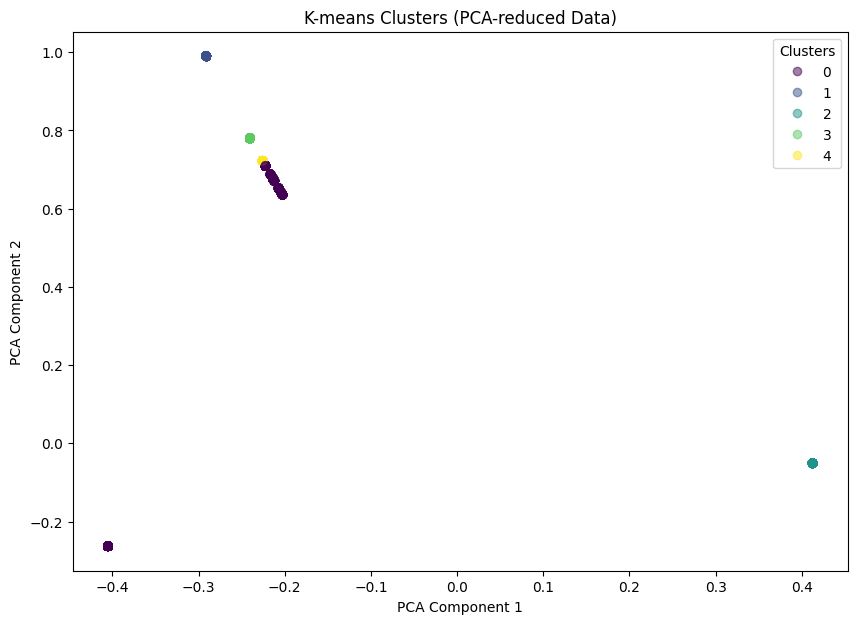

In [47]:
# Plotting PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title("K-means Clusters (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()